<div class="alert alert-block alert-info">

<b>Thank you for contributing to TeachOpenCADD!</b>

</div>

<div class="alert alert-block alert-info">

<b>Set up your PR</b>: Please check out our <a href="https://github.com/volkamerlab/teachopencadd/issues/41">issue</a> on how to set up a PR for new talktorials, including standard checks and TODOs.

</div>

# T05 . Transformer based Molecular Property prediction

Authors:

- Kalanika Elamaldeniya, 22/05/2023,Volkamer Lab, Saarland University


*The examples used in this talktorial template are taken from [__Talktorial T001__](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T001_query_chembl/talktorial.ipynb) and [__Talktorial T002__](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T002_compound_adme/talktorial.ipynb).*

<div class="alert alert-block alert-info">

<b>Cross-referencing talktorials</b>: If you want to cross-reference to existing talktorials in your notebook, please use the following formatting: <b>Talktorial T000</b>.

</div>

## Aim of this talktorial

In this tutorial, Aim is to provide a guide on using the Molecular Transformer model for solubility prediction. We will explain the Transformers and introduce the Molecular Transformer architecture. By utilizing the QM9 dataset, which contains molecular properties of small molecules, we will demonstrate how to train and evaluate the Molecular Transformer model using PyTorch

### Contents in *Theory*

_Add Table of Contents (TOC) for Theory section._

* Basics of Transformers
* Adapting Transformers for molecular property prediction
* Preprocessing and Data Preparation
* Model Architecture and traning





<div class="alert alert-block alert-info">

<b>Sync TOC with section titles</b>: These points should refer to the headlines of your <i>Theory</i> section.

</div>

### Contents in *Practical*

_Add Table of Contents (TOC) for Practical section._

* Connect to ChEMBL database
* Load and draw molecules

<div class="alert alert-block alert-info">

<b>Sync TOC with section titles</b>: These points should refer to the headlines of your <i>Practical</i> section.

</div>

### References

* Paper 
* Tutorial links
* Other useful resources

*We suggest the following citation style:*
* Keyword describing resource: <i>Journal</i> (year), <b>volume</b>, pages (link to resource) 

*Example:*
* ChEMBL web services: [<i>Nucleic Acids Res.</i> (2015), <b>43</b>, 612-620](https://academic.oup.com/nar/article/43/W1/W612/2467881) 

## Theory

<div class="alert alert-block alert-info">

<b>Sync section titles with TOC</b>: Please make sure that all section titles in the <i>Theory</i> section are synced with the bullet point list provided in the <i>Aim of this talktorial</i> > <i>Contents in Theory</i> section.

</div>

<div class="alert alert-block alert-info">
    
<b>Beware of section levels</b>: Please check if you are using the correct subsection levels. The section <i>Theory</i> is written in Markdown as <code>## Theory</code>, so every subsection within <i>Theory</i> is <code>###</code> or lower.

</div>

### Basics of Transformers

Transformers are a type of deep learning model that has gained significant attention for its ability to capture complex patterns and relationships in sequential data. Originally introduced for natural language processing tasks, transformers have since been applied successfully in various domains, including computer vision and molecular modeling.

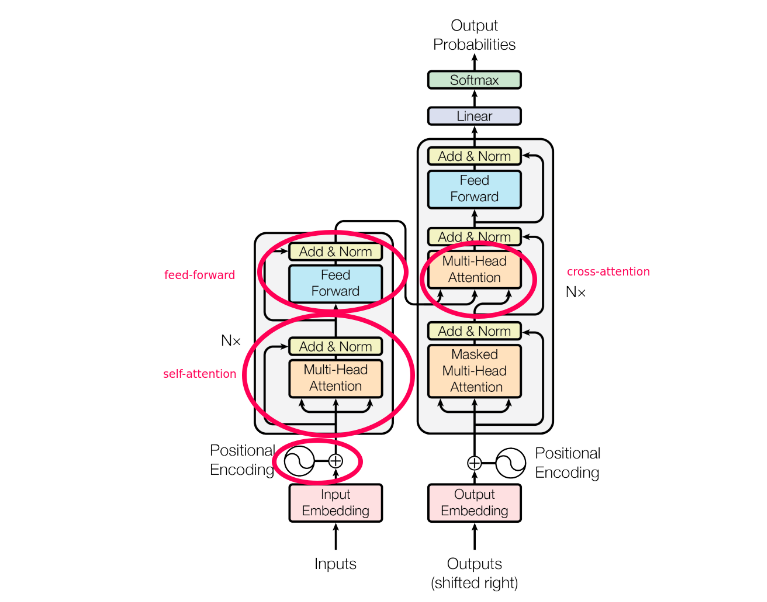
*Figure 1:* 
Transformer Model.
Figure and description taken from: [<i>Nucleic Acids Res.</i> (2015), <b>43</b>, 612-620](https://machinelearningmastery.com/the-transformer-model/).

<div class="alert alert-block alert-info">
    
<b>Figures</b>: Place images in the <code>images/</code> folder and include them using Markdown <code>![Figure title](images/some_figure.jpg)</code>. Add a figure caption in the format shown in the example.

</div>

### Compound activity measures

Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet.

$pIC_{50} = -log_{10}(IC_{50}*10^{-9})= 9-log_{10}(IC_{50}) $

<div class="alert alert-block alert-info">
    
<b>Formulas</b>: Please use LaTeX to format formulas.
</div>

If you place links, please link descriptive words.

> __Yes__: [ChEMBL](https://www.ebi.ac.uk/chembl/) is a manually curated database of bioactive molecules

> __No__: ChEMBL ([here](https://www.ebi.ac.uk/chembl/)) is a manually curated database of bioactive molecules

<div class="alert alert-block alert-info">
    
<b>Links</b>: If you place links, please link descriptive words.

</div>

## Practical

Add short summary of what will be done in this practical section.

<div class="alert alert-block alert-info">

<b>Sync section titles with TOC</b>: Please make sure that all section titles in the <i>Practical</i> section are synced with the bullet point list provided in the <i>Aim of this talktorial</i> > <i>Contents in Practical</i> section.

</div>

<div class="alert alert-block alert-info">
    
<b>Beware of section levels</b>: Please check if you are using the correct subsection levels. The section <i>Practical</i> is written in Markdown as <code>## Practical</code>, so every subsection within <i>Practical</i> is <code>###</code> or lower.

</div>

In [1]:
from pathlib import Path
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools

<div class="alert alert-block alert-info">

<b>Imports</b>: Please add all your imports on top of this section, ordered by standard library / 3rd party packages / our own (<code>teachopencadd.*</code>). 
Read more on imports and import order in the <a href="https://www.python.org/dev/peps/pep-0008/#imports">"PEP 8 -- Style Guide for Python Code"</a>.
    
</div>

In [2]:
HERE = Path(_dh[-1])
DATA = HERE / "data"

<div class="alert alert-block alert-info">

<b>Relative paths</b>: Please define all paths relative to this talktorial's path by using the global variable <code>HERE</code>.
If your talktorial has input/output data, please define the global <code>DATA</code>, which points to this talktorial's data folder (check out the default folder structure of each talktorial).
    
</div>

### Connect to ChEMBL database

_Explain what you will do and why here in the Markdown cell. This includes everything that has to do with the talktorial's storytelling._

In [3]:
# Add comments in the code cell if you want to comment on coding decisions

<div class="alert alert-block alert-info">

<b>Functions</b>: 

<ul>
<li>Please add <a href="https://numpydoc.readthedocs.io/en/latest/format.html">numpy docstrings</a> to your functions.</li>
<li>Please expose all variables used within a function in the function's signature (i.e. they must be function parameters), unless they are created within the scope of the function.</li>
<li>Please add comments to the steps performed in the function.</li>
<li>Please use meaningful function and parameter names. This applies also to variable names.</li>
</ul>
    
</div>

In [4]:
def calculate_ro5_properties(smiles):
    """
    Test if input molecule (SMILES) fulfills Lipinski's rule of five.

    Parameters
    ----------
    smiles : str
        SMILES for a molecule.

    Returns
    -------
    pandas.Series
        Molecular weight, number of hydrogen bond acceptors/donor and logP value
        and Lipinski's rule of five compliance for input molecule.
    """
    # RDKit molecule from SMILES
    molecule = Chem.MolFromSmiles(smiles)
    # Calculate Ro5-relevant chemical properties
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    # Ro5 conditions fulfilled?
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3
    # Return True if no more than one out of four conditions is violated
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, ro5_fulfilled],
        index=["molecular_weight", "n_hba", "n_hbd", "logp", "ro5_fulfilled"],
    )

### Load and draw molecules

_Explain what you will do and why here in the Markdown cell. This includes everything that has to do with the talktorial's storytelling._

In [5]:
# Add comments in the code cell if you want to comment on coding decisions

## Discussion

Wrap up the talktorial's content here and discuss pros/cons and open questions/challenges.

## Quiz

Ask three questions that the user should be able to answer after doing this talktorial. Choose important take-aways from this talktorial for your questions.

1. Question
2. Question
3. Question

<div class="alert alert-block alert-info">

<b>Useful checks at the end</b>: 
    
<ul>
<li>Clear output and rerun your complete notebook. Does it finish without errors?</li>
<li>Check if your talktorial's runtime is as excepted. If not, try to find out which step(s) take unexpectedly long.</li>
<li>Flag code cells with <code># TODO: CI</code> that have deterministic output and should be tested within our Continuous Integration (CI) framework.</li>
</ul>

</div>